In [31]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


## Support Vector Machine Implementation on Image Dataset

Dataset Link: https://www.kaggle.com/datasets/ayanzadeh93/color-classification

In [32]:
DATADIR = 'drive/MyDrive/Colab Notebooks/ColorClassification/ColorClassification/'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

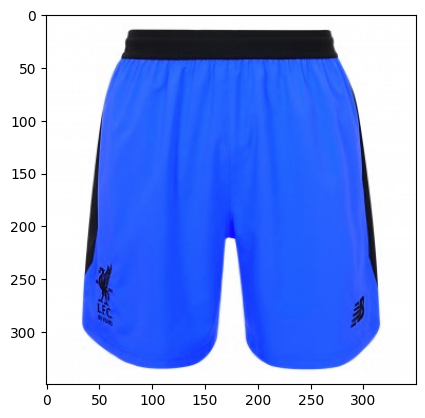

In [33]:
import matplotlib.pyplot as plt
import os
import cv2

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [34]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [35]:
create_training_data()

In [36]:
print(len(training_data))

lenofimage = len(training_data)

107


In [37]:
import numpy as np

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [38]:
X.shape

(107, 30000)

In [39]:
X = X/255.0

In [40]:
X[1]

array([0.69411765, 0.69411765, 0.69411765, ..., 0.87843137, 0.87843137,
       0.87843137])

In [41]:
y=np.array(y)

In [42]:
y.shape

(107,)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
from sklearn.svm import SVC


svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [45]:
y2 = svc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score


print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8888888888888888


In [47]:
from sklearn.metrics import classification_report


print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      0.75      0.75         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       0.86      0.86      0.86         7
           6       1.00      1.00      1.00         7
           7       1.00      0.80      0.89         5

    accuracy                           0.89        27
   macro avg       0.90      0.92      0.90        27
weighted avg       0.90      0.89      0.89        27



In [48]:
import pandas as pd

result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [49]:
result

,original,predicted
0,5,5
1,7,7
2,0,0
3,6,6
4,5,5
5,7,7
6,1,1
7,1,5
8,7,3
9,7,7
